<a href="https://colab.research.google.com/github/sohyun-jang/sohyun-jang/blob/main/CV_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ✅ 이미지 경로 설정
IMG_PATH = "/content/drive/MyDrive/Colab_Notebooks/parrot.png"

import os
if not os.path.exists(IMG_PATH):
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다:\n{IMG_PATH}")
else:
    print("이미지 경로 확인 완료 ✅!")

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive
이미지 경로 확인 완료 ✅!


In [ ]:
# =============================================================================
# 1️⃣ 이미지 읽기 및 전처리
# =============================================================================
parrot_img = cv.imread(IMG_PATH)
if parrot_img is None:
    raise FileNotFoundError("이미지를 불러올 수 없습니다.")

gray = cv.cvtColor(parrot_img, cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(parrot_img, cv.COLOR_BGR2RGB)

# 노이즈 제거를 위한 가우시안 블러
blurred = cv.GaussianBlur(gray, (5, 5), 1.4)

print(f"이미지 크기: {gray.shape}")

이미지 크기: (1198, 766)



🔍 Canny 엣지 검출 파라미터 비교...


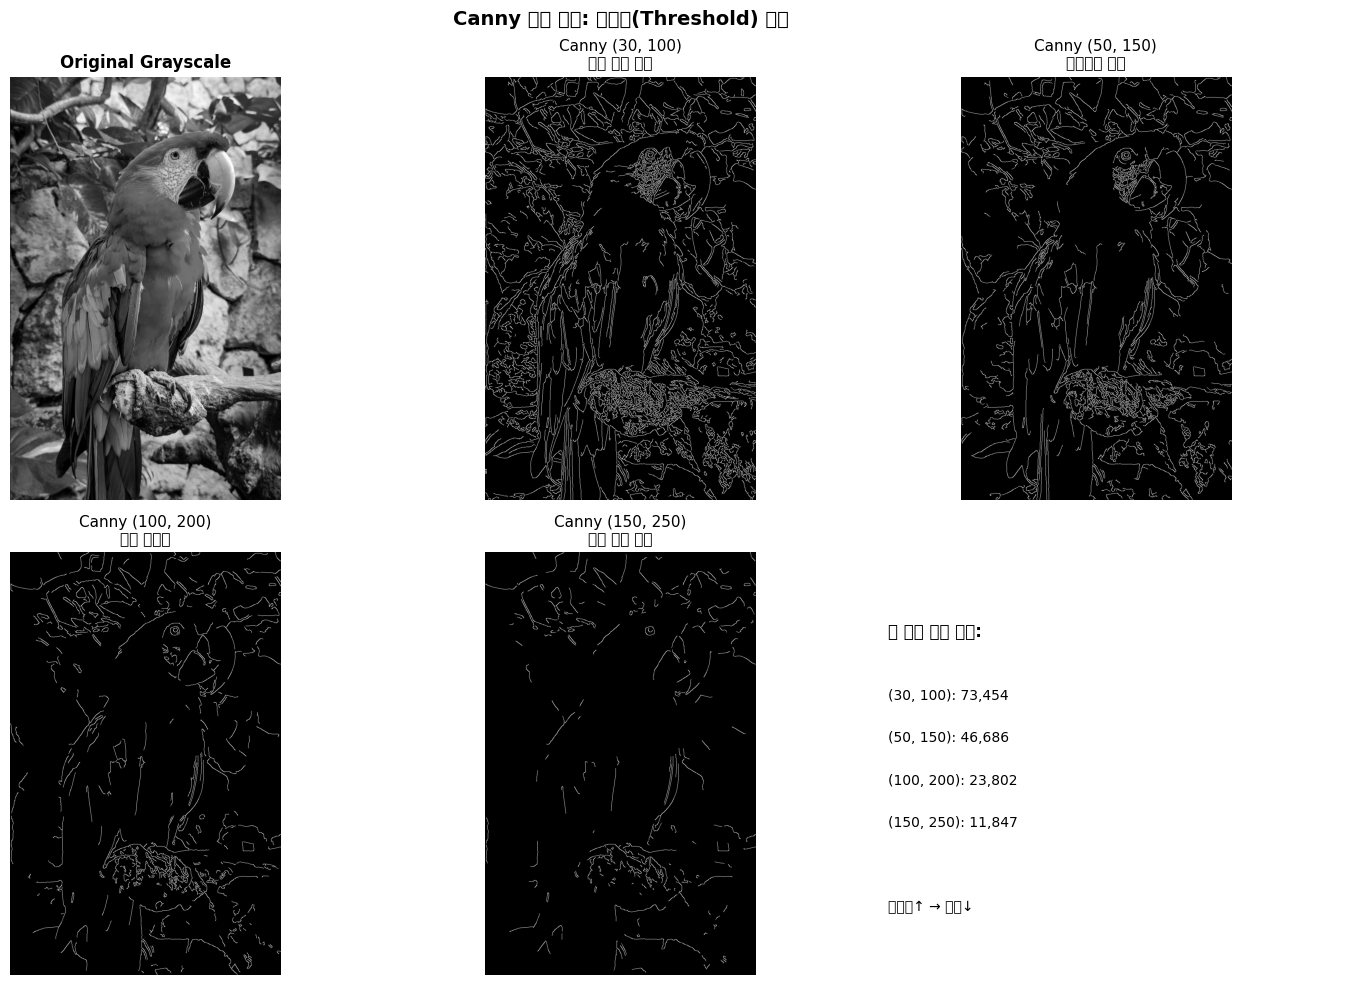

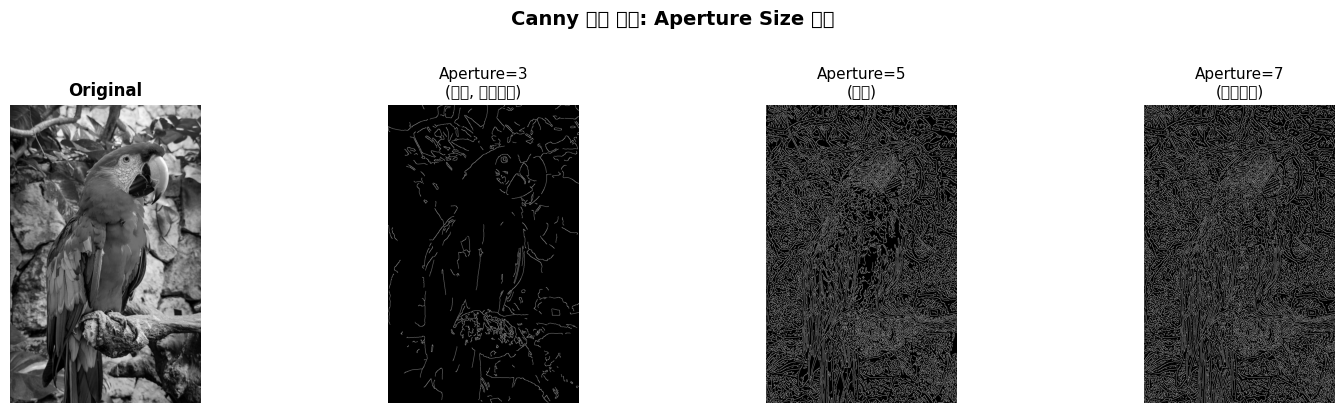

In [ ]:
# =============================================================================
# 2️⃣ Canny 엣지 검출 - 파라미터 비교
# =============================================================================
print("\n🔍 Canny 엣지 검출 파라미터 비교...")

# 다양한 임계값 조합
canny_50_150 = cv.Canny(blurred, 50, 150)
canny_100_200 = cv.Canny(blurred, 100, 200)
canny_150_250 = cv.Canny(blurred, 150, 250)
canny_30_100 = cv.Canny(blurred, 30, 100)

# Aperture 크기 비교 (Sobel 커널 크기)
canny_aperture3 = cv.Canny(blurred, 100, 200, apertureSize=3)
canny_aperture5 = cv.Canny(blurred, 100, 200, apertureSize=5)
canny_aperture7 = cv.Canny(blurred, 100, 200, apertureSize=7)

# 시각화 1: 임계값 비교
fig1, axs1 = plt.subplots(2, 3, figsize=(15, 10))

axs1[0,0].imshow(gray, cmap='gray')
axs1[0,0].set_title("Original Grayscale", fontsize=12, weight='bold')

axs1[0,1].imshow(canny_30_100, cmap='gray')
axs1[0,1].set_title("Canny (30, 100)\n많은 엣지 검출", fontsize=11)

axs1[0,2].imshow(canny_50_150, cmap='gray')
axs1[0,2].set_title("Canny (50, 150)\n균형잡힌 검출", fontsize=11)

axs1[1,0].imshow(canny_100_200, cmap='gray')
axs1[1,0].set_title("Canny (100, 200)\n강한 엣지만", fontsize=11)

axs1[1,1].imshow(canny_150_250, cmap='gray')
axs1[1,1].set_title("Canny (150, 250)\n매우 강한 엣지", fontsize=11)

# 엣지 픽셀 개수 비교
count_30_100 = np.sum(canny_30_100 > 0)
count_50_150 = np.sum(canny_50_150 > 0)
count_100_200 = np.sum(canny_100_200 > 0)
count_150_250 = np.sum(canny_150_250 > 0)

axs1[1,2].axis('off')
axs1[1,2].text(0.1, 0.8, "📊 엣지 픽셀 개수:", fontsize=12, weight='bold', transform=axs1[1,2].transAxes)
axs1[1,2].text(0.1, 0.65, f"(30, 100): {count_30_100:,}", fontsize=10, transform=axs1[1,2].transAxes)
axs1[1,2].text(0.1, 0.55, f"(50, 150): {count_50_150:,}", fontsize=10, transform=axs1[1,2].transAxes)
axs1[1,2].text(0.1, 0.45, f"(100, 200): {count_100_200:,}", fontsize=10, transform=axs1[1,2].transAxes)
axs1[1,2].text(0.1, 0.35, f"(150, 250): {count_150_250:,}", fontsize=10, transform=axs1[1,2].transAxes)
axs1[1,2].text(0.1, 0.15, "임계값↑ → 엣지↓", fontsize=10, style='italic', transform=axs1[1,2].transAxes)

for ax in axs1.ravel()[:-1]:
    ax.axis('off')

plt.suptitle("Canny 엣지 검출: 임계값(Threshold) 비교", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()

# 시각화 2: Aperture 크기 비교
fig2, axs2 = plt.subplots(1, 4, figsize=(16, 4))

axs2[0].imshow(gray, cmap='gray')
axs2[0].set_title("Original", fontsize=12, weight='bold')

axs2[1].imshow(canny_aperture3, cmap='gray')
axs2[1].set_title("Aperture=3\n(기본, 날카로움)", fontsize=11)

axs2[2].imshow(canny_aperture5, cmap='gray')
axs2[2].set_title("Aperture=5\n(중간)", fontsize=11)

axs2[3].imshow(canny_aperture7, cmap='gray')
axs2[3].set_title("Aperture=7\n(부드러움)", fontsize=11)

for ax in axs2:
    ax.axis('off')

plt.suptitle("Canny 엣지 검출: Aperture Size 비교", fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


🔍 Sobel 엣지 검출 파라미터 비교...


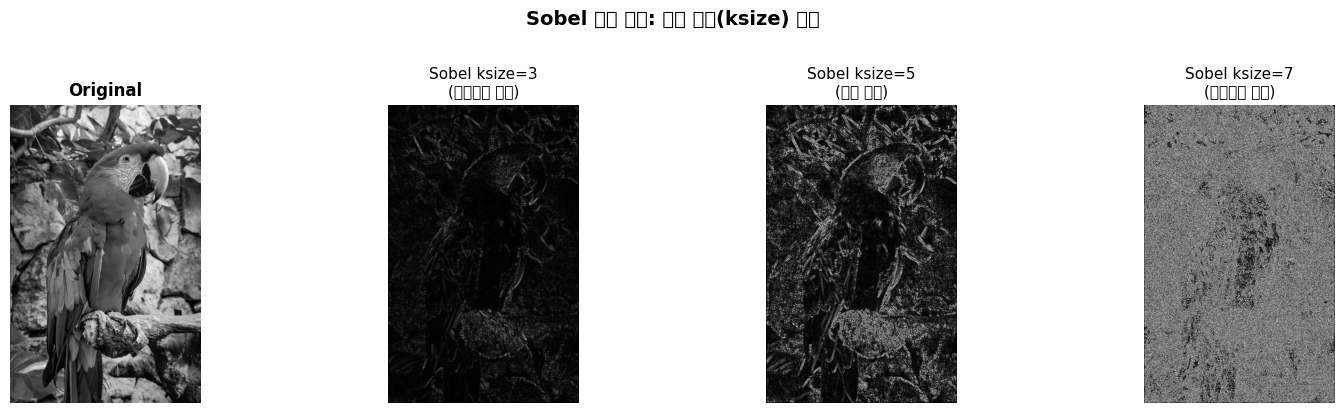

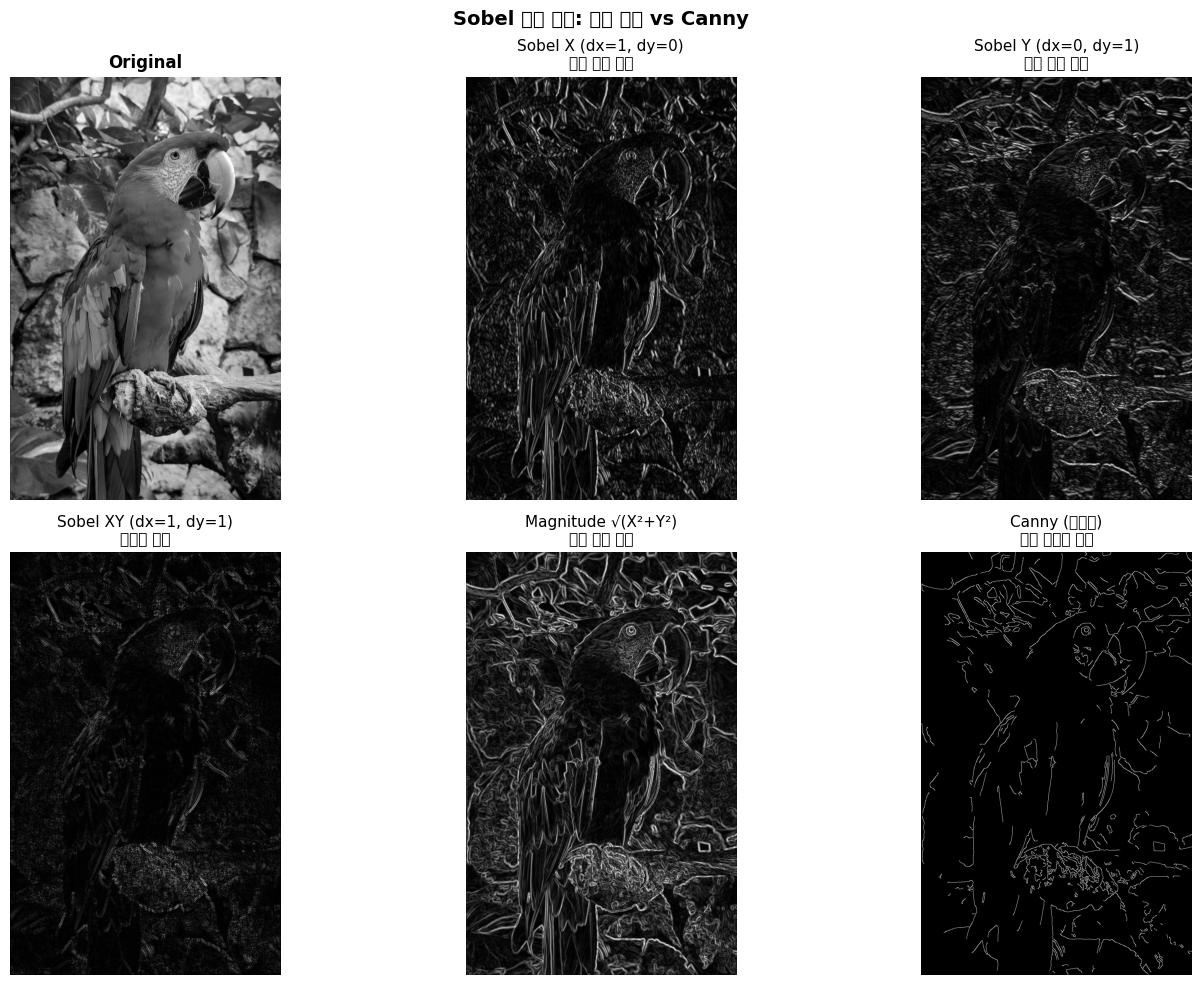

In [ ]:
# =============================================================================
# 3️⃣ Sobel 엣지 검출 - 파라미터 비교
# =============================================================================
print("\n🔍 Sobel 엣지 검출 파라미터 비교...")

# 커널 크기 비교
sobel_k3 = cv.Sobel(blurred, cv.CV_64F, 1, 1, ksize=3)
sobel_k5 = cv.Sobel(blurred, cv.CV_64F, 1, 1, ksize=5)
sobel_k7 = cv.Sobel(blurred, cv.CV_64F, 1, 1, ksize=7)

# 방향별 비교
sobel_x = cv.Sobel(blurred, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(blurred, cv.CV_64F, 0, 1, ksize=3)
sobel_xy = cv.Sobel(blurred, cv.CV_64F, 1, 1, ksize=3)
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)

# 절대값 및 정규화
sobel_k3 = np.uint8(np.absolute(sobel_k3))
sobel_k5 = np.uint8(np.absolute(sobel_k5))
sobel_k7 = np.uint8(np.absolute(sobel_k7))
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))
sobel_xy = np.uint8(np.absolute(sobel_xy))
sobel_mag = np.uint8(np.absolute(sobel_mag))

# 시각화 1: 커널 크기 비교
fig3, axs3 = plt.subplots(1, 4, figsize=(16, 4))

axs3[0].imshow(gray, cmap='gray')
axs3[0].set_title("Original", fontsize=12, weight='bold')

axs3[1].imshow(sobel_k3, cmap='gray')
axs3[1].set_title("Sobel ksize=3\n(날카로운 엣지)", fontsize=11)

axs3[2].imshow(sobel_k5, cmap='gray')
axs3[2].set_title("Sobel ksize=5\n(중간 엣지)", fontsize=11)

axs3[3].imshow(sobel_k7, cmap='gray')
axs3[3].set_title("Sobel ksize=7\n(부드러운 엣지)", fontsize=11)

for ax in axs3:
    ax.axis('off')

plt.suptitle("Sobel 엣지 검출: 커널 크기(ksize) 비교", fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 시각화 2: 방향별 비교
fig4, axs4 = plt.subplots(2, 3, figsize=(15, 10))

axs4[0,0].imshow(gray, cmap='gray')
axs4[0,0].set_title("Original", fontsize=12, weight='bold')

axs4[0,1].imshow(sobel_x, cmap='gray')
axs4[0,1].set_title("Sobel X (dx=1, dy=0)\n세로 엣지 강조", fontsize=11)

axs4[0,2].imshow(sobel_y, cmap='gray')
axs4[0,2].set_title("Sobel Y (dx=0, dy=1)\n가로 엣지 강조", fontsize=11)

axs4[1,0].imshow(sobel_xy, cmap='gray')
axs4[1,0].set_title("Sobel XY (dx=1, dy=1)\n대각선 엣지", fontsize=11)

axs4[1,1].imshow(sobel_mag, cmap='gray')
axs4[1,1].set_title("Magnitude √(X²+Y²)\n모든 방향 엣지", fontsize=11)

# Canny와 Sobel 비교
axs4[1,2].imshow(canny_100_200, cmap='gray')
axs4[1,2].set_title("Canny (비교용)\n얇고 정확한 엣지", fontsize=11)

for ax in axs4.ravel():
    ax.axis('off')

plt.suptitle("Sobel 엣지 검출: 방향 비교 vs Canny", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()


📏 Hough Line Transform 직선 검출...


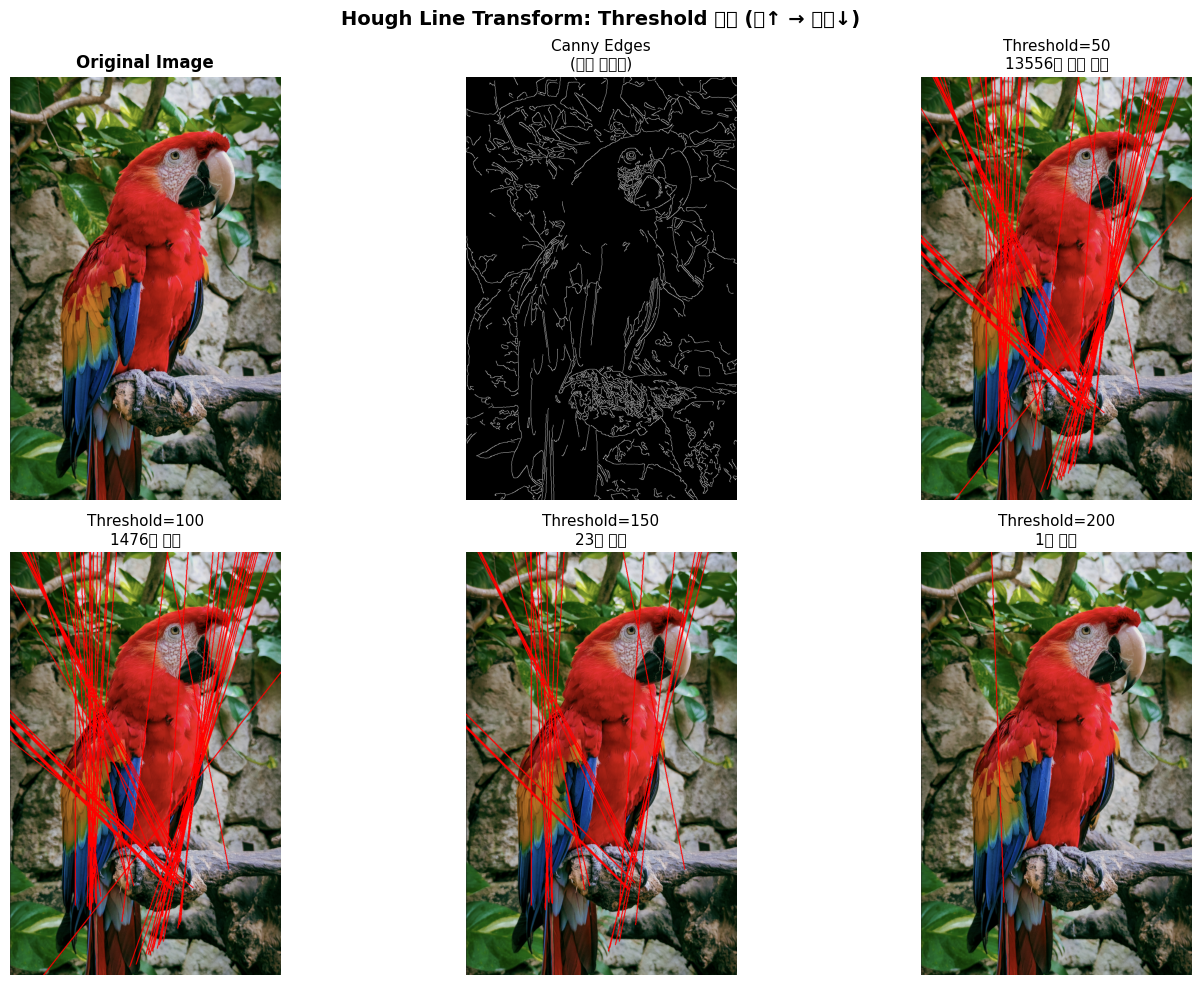

In [ ]:
# =============================================================================
# 4️⃣ Hough Line Transform - 파라미터 비교
# =============================================================================
print("\n📏 Hough Line Transform 직선 검출...")

# Canny 엣지를 기반으로 직선 검출
edges_for_hough = cv.Canny(blurred, 50, 150)

# 다양한 threshold 값으로 직선 검출
def draw_hough_lines(image, edges, threshold, color=(255, 0, 0), thickness=2):
    """Hough Line Transform으로 직선 그리기"""
    lines = cv.HoughLines(edges, 1, np.pi/180, threshold)
    result = image.copy()

    if lines is not None:
        for line in lines[:50]:  # 최대 50개만 그리기
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv.line(result, (x1, y1), (x2, y2), color, thickness)

    return result, len(lines) if lines is not None else 0

# 다양한 threshold로 직선 검출
hough_50, count_50 = draw_hough_lines(rgb, edges_for_hough, 50)
hough_100, count_100 = draw_hough_lines(rgb, edges_for_hough, 100)
hough_150, count_150 = draw_hough_lines(rgb, edges_for_hough, 150)
hough_200, count_200 = draw_hough_lines(rgb, edges_for_hough, 200)

# 시각화
fig5, axs5 = plt.subplots(2, 3, figsize=(15, 10))

axs5[0,0].imshow(rgb)
axs5[0,0].set_title("Original Image", fontsize=12, weight='bold')

axs5[0,1].imshow(edges_for_hough, cmap='gray')
axs5[0,1].set_title("Canny Edges\n(입력 데이터)", fontsize=11)

axs5[0,2].imshow(hough_50)
axs5[0,2].set_title(f"Threshold=50\n{count_50}개 직선 검출", fontsize=11)

axs5[1,0].imshow(hough_100)
axs5[1,0].set_title(f"Threshold=100\n{count_100}개 직선", fontsize=11)

axs5[1,1].imshow(hough_150)
axs5[1,1].set_title(f"Threshold=150\n{count_150}개 직선", fontsize=11)

axs5[1,2].imshow(hough_200)
axs5[1,2].set_title(f"Threshold=200\n{count_200}개 직선", fontsize=11)

for ax in axs5.ravel():
    ax.axis('off')

plt.suptitle("Hough Line Transform: Threshold 비교 (값↑ → 직선↓)", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()


📏 Probabilistic Hough Line Transform...


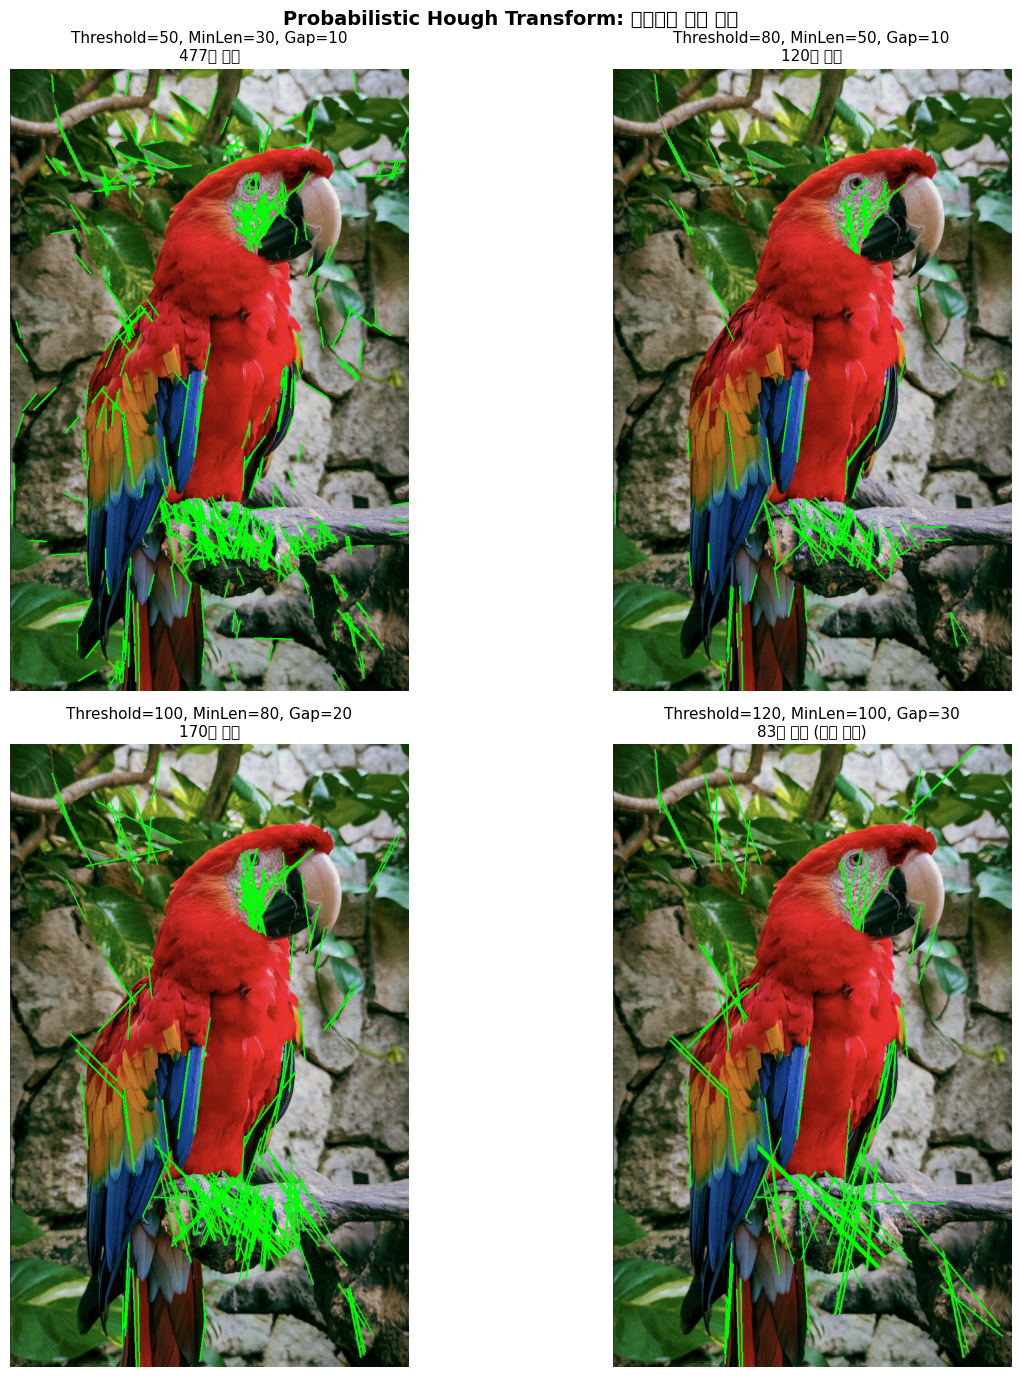

In [ ]:
# =============================================================================
# 5️⃣ Hough Line P (Probabilistic) - 더 효율적인 방법
# =============================================================================
print("\n📏 Probabilistic Hough Line Transform...")

def draw_hough_lines_p(image, edges, threshold, min_line_length, max_line_gap):
    """확률적 Hough Transform으로 선분 그리기"""
    lines = cv.HoughLinesP(edges, 1, np.pi/180, threshold,
                           minLineLength=min_line_length,
                           maxLineGap=max_line_gap)
    result = image.copy()

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv.line(result, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return result, len(lines) if lines is not None else 0

# 파라미터 변화에 따른 검출
houghp_1, count_p1 = draw_hough_lines_p(rgb, edges_for_hough, 50, 30, 10)
houghp_2, count_p2 = draw_hough_lines_p(rgb, edges_for_hough, 80, 50, 10)
houghp_3, count_p3 = draw_hough_lines_p(rgb, edges_for_hough, 100, 80, 20)
houghp_4, count_p4 = draw_hough_lines_p(rgb, edges_for_hough, 120, 100, 30)

fig6, axs6 = plt.subplots(2, 2, figsize=(14, 14))

axs6[0,0].imshow(houghp_1)
axs6[0,0].set_title(f"Threshold=50, MinLen=30, Gap=10\n{count_p1}개 선분", fontsize=11)

axs6[0,1].imshow(houghp_2)
axs6[0,1].set_title(f"Threshold=80, MinLen=50, Gap=10\n{count_p2}개 선분", fontsize=11)

axs6[1,0].imshow(houghp_3)
axs6[1,0].set_title(f"Threshold=100, MinLen=80, Gap=20\n{count_p3}개 선분", fontsize=11)

axs6[1,1].imshow(houghp_4)
axs6[1,1].set_title(f"Threshold=120, MinLen=100, Gap=30\n{count_p4}개 선분 (가장 엄격)", fontsize=11)

for ax in axs6.ravel():
    ax.axis('off')

plt.suptitle("Probabilistic Hough Transform: 파라미터 조합 비교", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()


📐 RANSAC 직선 검출...


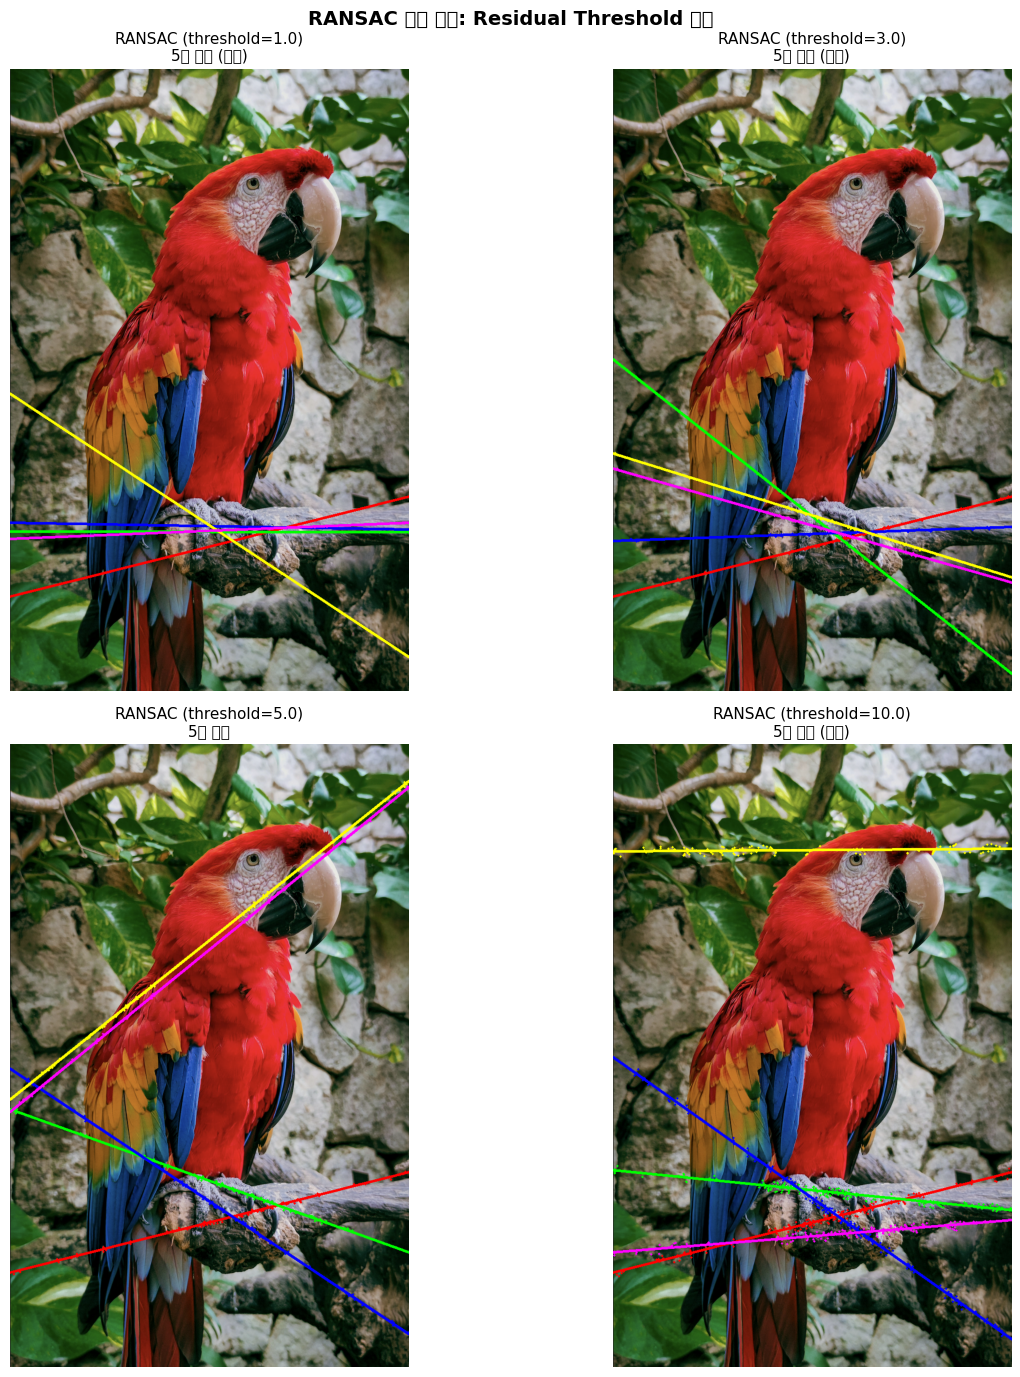

In [ ]:
# =============================================================================
# 6️⃣ RANSAC 직선 검출
# =============================================================================
print("\n📐 RANSAC 직선 검출...")

def detect_lines_ransac(edges, n_lines=5, residual_threshold=3.0):
    """RANSAC을 사용한 직선 검출"""
    # 엣지 포인트 추출
    points = np.column_stack(np.where(edges > 0))

    if len(points) < 10:
        return []

    lines = []
    remaining_points = points.copy()

    for _ in range(n_lines):
        if len(remaining_points) < 10:
            break

        # RANSAC으로 직선 피팅
        y = remaining_points[:, 0]
        X = remaining_points[:, 1].reshape(-1, 1)

        try:
            ransac = RANSACRegressor(residual_threshold=residual_threshold,
                                     max_trials=100,
                                     random_state=42)
            ransac.fit(X, y)

            # 인라이어 마스크
            inlier_mask = ransac.inlier_mask_

            # 직선 파라미터
            slope = ransac.estimator_.coef_[0]
            intercept = ransac.estimator_.intercept_

            # 인라이어 포인트
            inliers = remaining_points[inlier_mask]

            if len(inliers) > 10:
                lines.append({
                    'slope': slope,
                    'intercept': intercept,
                    'inliers': inliers,
                    'n_inliers': len(inliers)
                })

                # 인라이어 제거
                remaining_points = remaining_points[~inlier_mask]
        except:
            break

    return lines

def draw_ransac_lines(image, lines):
    """RANSAC으로 검출된 직선 그리기"""
    result = image.copy()
    h, w = image.shape[:2]

    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255),
              (255, 255, 0), (255, 0, 255)]

    for i, line in enumerate(lines):
        slope = line['slope']
        intercept = line['intercept']

        # 이미지 경계에서의 점 계산
        x1, x2 = 0, w-1
        y1 = int(slope * x1 + intercept)
        y2 = int(slope * x2 + intercept)

        color = colors[i % len(colors)]
        cv.line(result, (x1, y1), (x2, y2), color, 3)

        # 인라이어 포인트 표시
        for point in line['inliers'][::10]:  # 10개마다 표시
            cv.circle(result, (int(point[1]), int(point[0])), 2, color, -1)

    return result

# 다양한 residual_threshold로 RANSAC 적용
ransac_lines_1 = detect_lines_ransac(edges_for_hough, n_lines=5, residual_threshold=1.0)
ransac_lines_3 = detect_lines_ransac(edges_for_hough, n_lines=5, residual_threshold=3.0)
ransac_lines_5 = detect_lines_ransac(edges_for_hough, n_lines=5, residual_threshold=5.0)
ransac_lines_10 = detect_lines_ransac(edges_for_hough, n_lines=5, residual_threshold=10.0)

ransac_result_1 = draw_ransac_lines(rgb, ransac_lines_1)
ransac_result_3 = draw_ransac_lines(rgb, ransac_lines_3)
ransac_result_5 = draw_ransac_lines(rgb, ransac_lines_5)
ransac_result_10 = draw_ransac_lines(rgb, ransac_lines_10)

# 시각화
fig7, axs7 = plt.subplots(2, 2, figsize=(14, 14))

axs7[0,0].imshow(ransac_result_1)
axs7[0,0].set_title(f"RANSAC (threshold=1.0)\n{len(ransac_lines_1)}개 직선 (엄격)", fontsize=11)

axs7[0,1].imshow(ransac_result_3)
axs7[0,1].set_title(f"RANSAC (threshold=3.0)\n{len(ransac_lines_3)}개 직선 (균형)", fontsize=11)

axs7[1,0].imshow(ransac_result_5)
axs7[1,0].set_title(f"RANSAC (threshold=5.0)\n{len(ransac_lines_5)}개 직선", fontsize=11)

axs7[1,1].imshow(ransac_result_10)
axs7[1,1].set_title(f"RANSAC (threshold=10.0)\n{len(ransac_lines_10)}개 직선 (관대)", fontsize=11)

for ax in axs7.ravel():
    ax.axis('off')

plt.suptitle("RANSAC 직선 검출: Residual Threshold 비교", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()


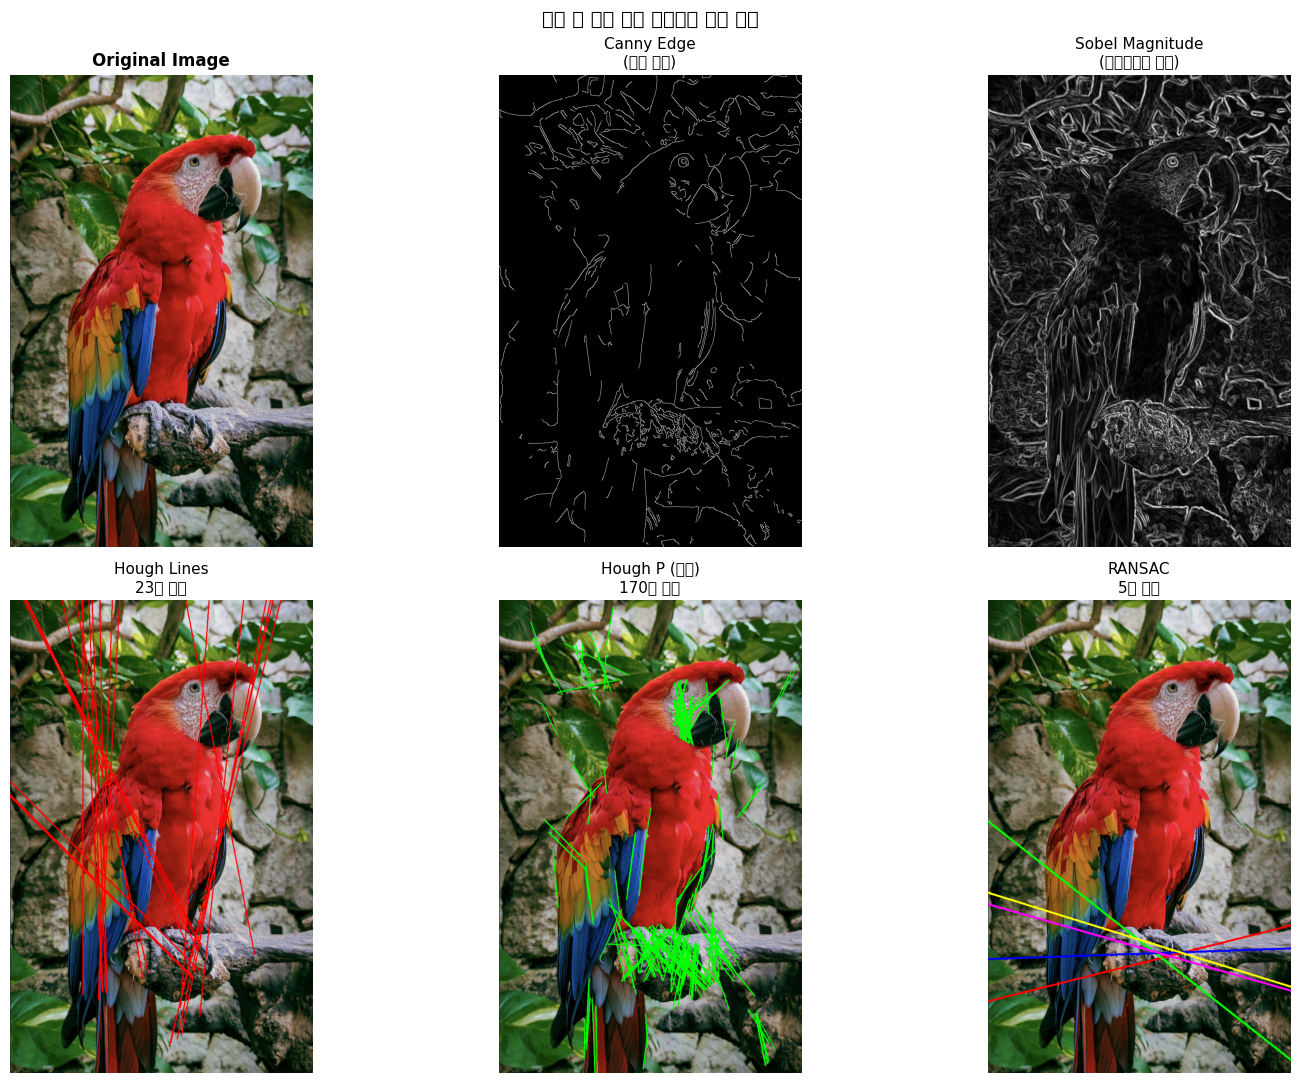

In [ ]:
# =============================================================================
# 7️⃣ 알고리즘 비교 종합
# =============================================================================
fig8, axs8 = plt.subplots(2, 3, figsize=(16, 11))

axs8[0,0].imshow(rgb)
axs8[0,0].set_title("Original Image", fontsize=12, weight='bold')

axs8[0,1].imshow(canny_100_200, cmap='gray')
axs8[0,1].set_title("Canny Edge\n(얇고 정확)", fontsize=11)

axs8[0,2].imshow(sobel_mag, cmap='gray')
axs8[0,2].set_title("Sobel Magnitude\n(그라디언트 강도)", fontsize=11)

axs8[1,0].imshow(hough_150)
axs8[1,0].set_title(f"Hough Lines\n{count_150}개 직선", fontsize=11)

axs8[1,1].imshow(houghp_3)
axs8[1,1].set_title(f"Hough P (선분)\n{count_p3}개 선분", fontsize=11)

axs8[1,2].imshow(ransac_result_3)
axs8[1,2].set_title(f"RANSAC\n{len(ransac_lines_3)}개 직선", fontsize=11)

for ax in axs8.ravel():
    ax.axis('off')

plt.suptitle("엣지 및 직선 검출 알고리즘 종합 비교", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# 📊 파라미터 효과 요약
# =============================================================================
print("\n" + "="*70)
print("📋 파라미터 효과 요약")
print("="*70)

print("\n🔹 Canny Edge Detection:")
print("   • Low Threshold ↑ → 약한 엣지 제거, 노이즈 감소")
print("   • High Threshold ↑ → 강한 엣지만 검출")
print("   • Aperture Size ↑ → 엣지 두께 증가, 부드러워짐")
print("   • 권장: Low:High = 1:2 또는 1:3 비율")

print("\n🔹 Sobel Edge Detection:")
print("   • Kernel Size ↑ → 엣지 두께 증가, 노이즈 감소")
print("   • dx, dy 조합으로 방향 선택 가능")
print("   • Canny보다 두껍고 덜 정확하지만 빠름")

print("\n🔹 Hough Line Transform:")
print("   • Threshold ↑ → 검출 직선 수↓, 강한 직선만")
print("   • rho: 거리 해상도 (보통 1 픽셀)")
print("   • theta: 각도 해상도 (보통 π/180 = 1도)")

print("\n🔹 Probabilistic Hough:")
print("   • Threshold ↑ → 검출 선분 수↓")
print("   • MinLineLength ↑ → 긴 선분만 검출")
print("   • MaxLineGap ↑ → 끊어진 선을 하나로 연결")
print("   • 일반 Hough보다 빠르고 선분 정보 제공")

print("\n🔹 RANSAC:")
print("   • Residual Threshold ↑ → 더 많은 점을 인라이어로 인정")
print("   • Threshold ↓ → 더 정확한 직선, 검출 수↓")
print("   • 노이즈에 강건, 아웃라이어 제거 우수")
print("   • Hough보다 느리지만 더 정확")

print("\n" + "="*70)
print("\n✅ 모든 엣지 및 직선 검출 작업 완료!")
print("="*70)


📋 파라미터 효과 요약

🔹 Canny Edge Detection:
   • Low Threshold ↑ → 약한 엣지 제거, 노이즈 감소
   • High Threshold ↑ → 강한 엣지만 검출
   • Aperture Size ↑ → 엣지 두께 증가, 부드러워짐
   • 권장: Low:High = 1:2 또는 1:3 비율

🔹 Sobel Edge Detection:
   • Kernel Size ↑ → 엣지 두께 증가, 노이즈 감소
   • dx, dy 조합으로 방향 선택 가능
   • Canny보다 두껍고 덜 정확하지만 빠름

🔹 Hough Line Transform:
   • Threshold ↑ → 검출 직선 수↓, 강한 직선만
   • rho: 거리 해상도 (보통 1 픽셀)
   • theta: 각도 해상도 (보통 π/180 = 1도)

🔹 Probabilistic Hough:
   • Threshold ↑ → 검출 선분 수↓
   • MinLineLength ↑ → 긴 선분만 검출
   • MaxLineGap ↑ → 끊어진 선을 하나로 연결
   • 일반 Hough보다 빠르고 선분 정보 제공

🔹 RANSAC:
   • Residual Threshold ↑ → 더 많은 점을 인라이어로 인정
   • Threshold ↓ → 더 정확한 직선, 검출 수↓
   • 노이즈에 강건, 아웃라이어 제거 우수
   • Hough보다 느리지만 더 정확


✅ 모든 엣지 및 직선 검출 작업 완료!
